В предоставленом отчете исследуется характер и зависимость от различных факторов задержек рейсов в 3 аэропортах Нью-Йорка в 2013 году. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
df = pd.read_csv(url, index_col = 0)
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


In [2]:
url1 = 'weather.txt'
w = pd.read_csv(url1, index_col = 0)
w

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
1,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
2,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
3,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
4,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
5,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
6,EWR,2013,1,1,6,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
7,EWR,2013,1,1,7,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
8,EWR,2013,1,1,8,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0
9,EWR,2013,1,1,9,39.92,28.04,62.21,250.0,12.65858,14.567241,0.0,1012.2,10.0
10,EWR,2013,1,1,10,39.02,28.04,64.43,260.0,12.65858,14.567241,0.0,1011.9,10.0


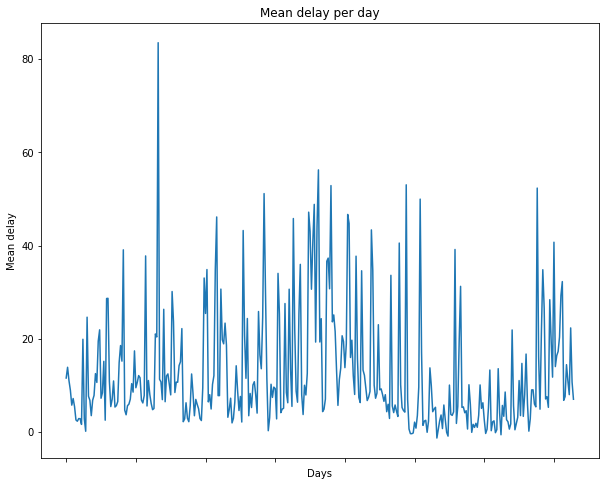

In [17]:
# Ex1 - средняя задержка по дням за год
plt.figure(figsize=(10,8))
df.groupby(['month', 'day'])['dep_delay'].mean().plot()
#plt.scatter(np.arange(365), df_mean)
plt.title('Mean delay per day')
plt.xlabel('Days')
plt.ylabel('Mean delay')
plt.show()

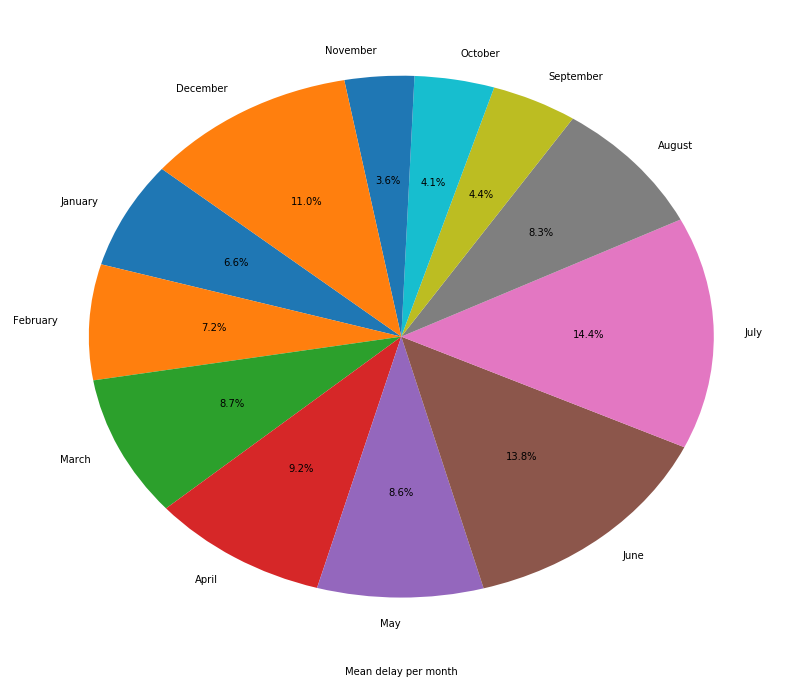

In [4]:
# Ex2 - средняя задержка по месяцам за год
labels = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(14,12))
m = df.groupby('month')['dep_delay'].mean()
plt.pie(m, labels = labels, autopct='%1.1f%%', startangle=140)
plt.xlabel('Mean delay per month')
plt.show()

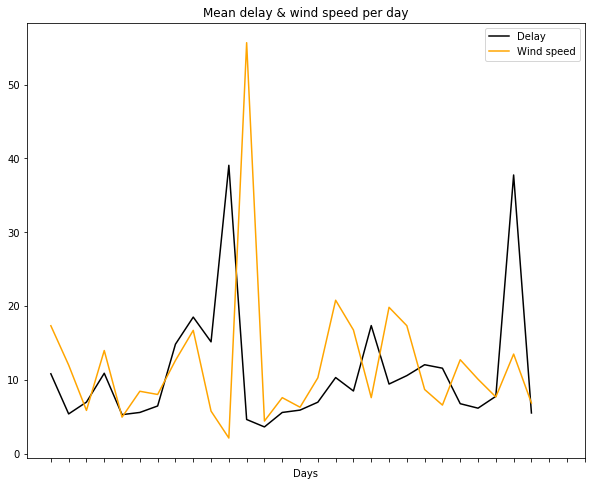

In [18]:
# Ex3 - сравнение средней задержки и средней скорости ветра в феврале(взят для наглядности; в остальные месяцы тенденция та же)
plt.figure(figsize=(10,8))
df[df['month']==2].groupby(['month', 'day'])['dep_delay'].mean().plot(color = 'black', label = 'Delay')
w[w['month']==2].groupby(['month', 'day'])['wind_speed'].mean().plot(color = 'orange', label = 'Wind speed')
plt.xticks(range(31))
plt.legend()
plt.title('Mean delay & wind speed per day')
plt.xlabel('Days')
plt.show()

Depature according to origin


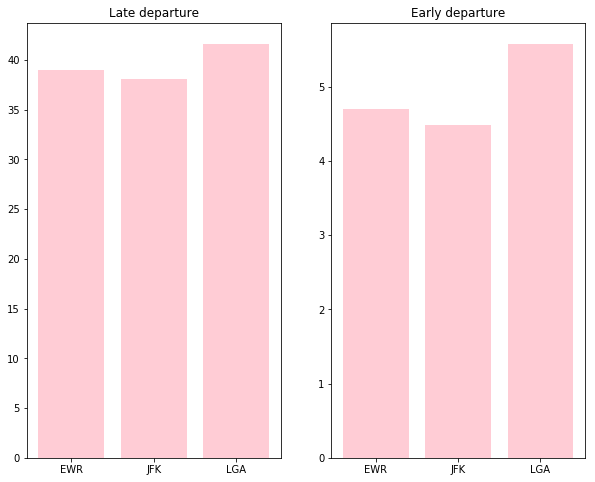

In [6]:
# Ex4 - среднее значение поздних и ранних вылетов по трем аэропортам
plt.figure(figsize=(10,8))
a = df[df.dep_delay > 0].groupby('origin')['dep_delay'].mean()
b = df[df.dep_delay < 0].groupby('origin')['dep_delay'].mean()
print('Depature according to origin')
plt.subplot(1,2,1)
plt.bar(np.arange(3), a, alpha=0.8, color = 'pink')
plt.xticks(np.arange(3), ('EWR','JFK','LGA'))
plt.title('Late departure')
plt.subplot(1,2,2)
plt.bar(np.arange(3), b.abs(), alpha=0.8, color = 'pink')
plt.xticks(np.arange(3), ('EWR','JFK','LGA'))
plt.title('Early departure')
plt.show()

Depature according to carrier


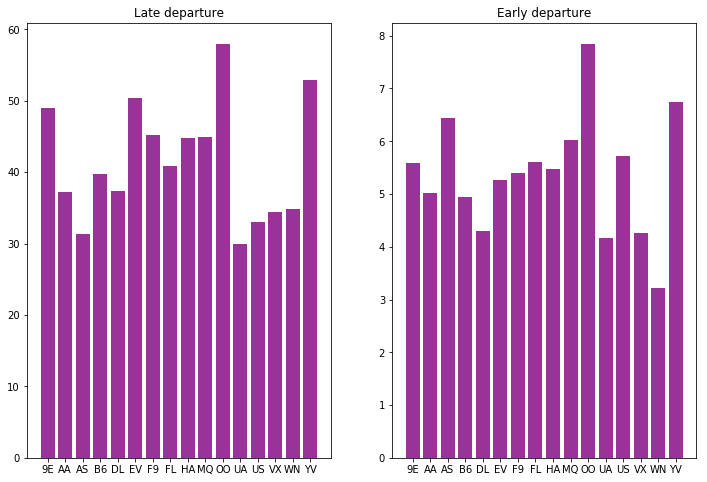

In [7]:
# Ex5 - среднее значение поздних и ранних вылетов по перевозчикам
plt.figure(figsize=(12,8))
a = df[df.dep_delay > 0].groupby('carrier')['dep_delay'].mean()
b = df[df.dep_delay < 0].groupby('carrier')['dep_delay'].mean()
print('Depature according to carrier')
plt.subplot(1,2,1)
plt.bar(np.arange(len(df['carrier'].unique())), a, alpha=0.8, color = 'purple')
plt.xticks(np.arange(len(df['carrier'].unique())), ('9E','AA','AS','B6','DL','EV','F9','FL','HA','MQ','OO','UA','US','VX','WN','YV'))
plt.title('Late departure')
plt.subplot(1,2,2)
plt.bar(np.arange(len(df['carrier'].unique())), b.abs(), alpha=0.8, color = 'purple')
plt.xticks(np.arange(len(df['carrier'].unique())), ('9E','AA','AS','B6','DL','EV','F9','FL','HA','MQ','OO','UA','US','VX','WN','YV'))
plt.title('Early departure')
plt.show()

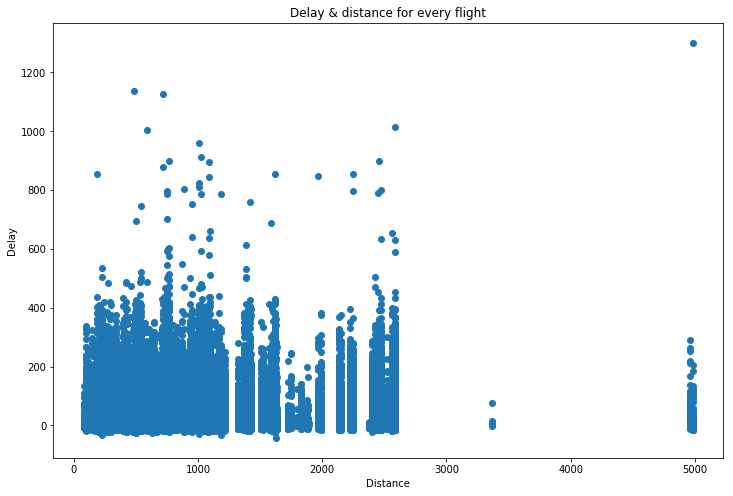

In [19]:
# Ex6 - задержка вылета не зависит от расстояния полета
plt.figure(figsize=(12,8))
plt.scatter(df['distance'], df['dep_delay'])
plt.title('Delay & distance for every flight')
plt.xlabel('Distance')
plt.ylabel('Delay')
plt.show()

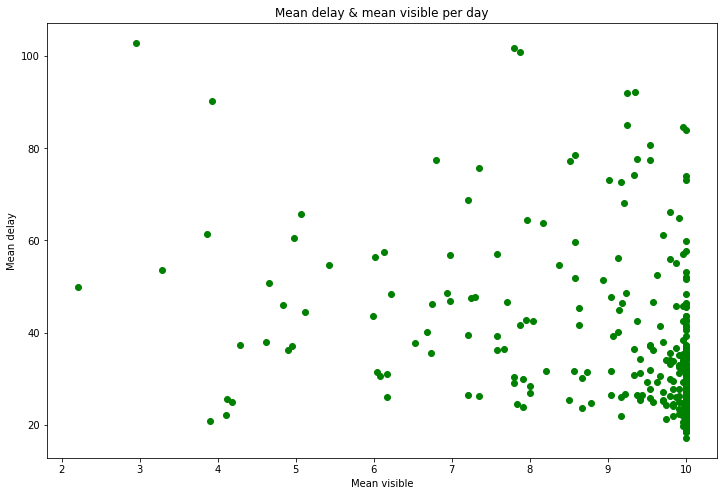

In [20]:
# Ex7 - асимптотика задержки вылета при видимости 10.0
plt.figure(figsize=(12,8))
plt.scatter(w.groupby(['month','day'])['visib'].mean(), df[df.dep_delay > 0].groupby(['month','day'])['dep_delay'].mean()[0:364], color = 'green')
plt.title('Mean delay & mean visible per day')
plt.xlabel('Mean visible')
plt.ylabel('Mean delay')
plt.show()

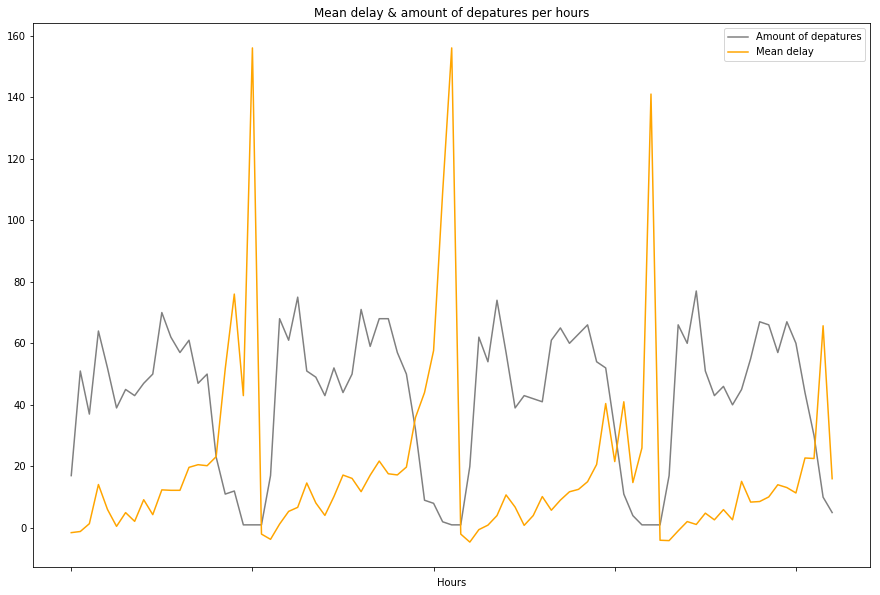

In [22]:
# Ex8 - зависимость количества самолетов, вылетающих в конкретный час, от средней задержки вылетов в данный час
plt.figure(figsize=(15,10))
df[df.month==1][df[df.month==1].day<=4].groupby(['day','hour'])['dep_delay'].count().plot(color = 'grey', label = 'Amount of depatures')
df[df.month==1][df[df.month==1].day<=4].groupby(['day','hour'])['dep_delay'].mean().plot(color = 'orange', label = 'Mean delay')
plt.legend()
plt.title('Mean delay & amount of depatures per hours')
plt.xlabel('Hours')
plt.show()

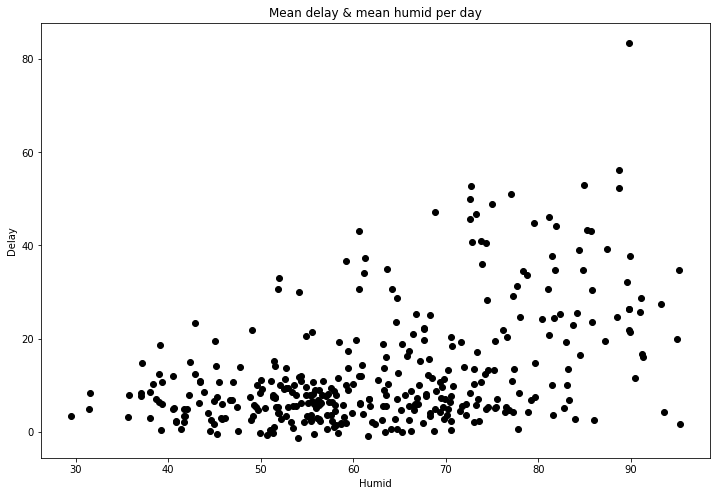

In [23]:
# Ex9 - зависимость задержек рейсов от влажности
plt.figure(figsize=(12,8))
plt.scatter(w.groupby(['month','day'])['humid'].mean(), df.groupby(['month','day'])['dep_delay'].mean()[0:364], color = 'black')
plt.title('Mean delay & mean humid per day')
plt.xlabel('Humid')
plt.ylabel('Delay')
plt.show()

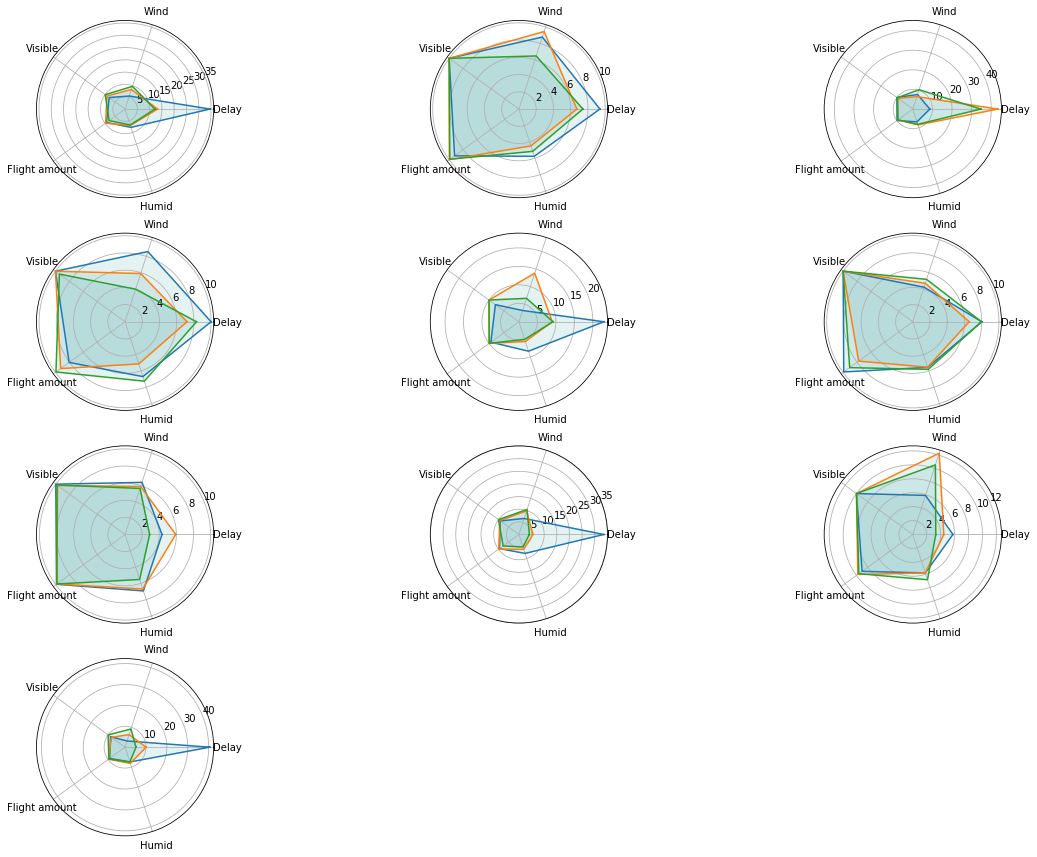

In [24]:
# Ex10 - наглядная демонстрация зависимости задержки рейсов от скорости ветра, видимости, количества самолетов в очереди на
# вылет, влажности. Для компактности на каждом из графиков изображено по 3 дня
import math

dep_mean = df.groupby(['month', 'day'])['dep_delay'].mean()
wind = w.groupby(['month', 'day'])['wind_speed'].mean()
vis = w.groupby(['month','day'])['visib'].mean()
dep_c = df.groupby(['month','day'])['dep_delay'].count()
h = w.groupby(['month','day'])['humid'].mean()

angles = [n / float(5) * 2 * math.pi for n in range(5)]
angles += angles [:1]

plt.figure(figsize=(20,15))
i=8
for k in range(1,11):
    plt.subplot(4,3,k, polar=True)
    plt.xticks(angles[:-1], ['Delay','Wind','Visible','Flight amount','Humid'])
    for m in range(1,4):
        j=(k-1)*3+m
        values = [dep_mean[i][j], wind[i][j], vis[i][j], dep_c[i][j]/100, h[i][j]/10, dep_mean[i][j]]
        plt.plot(angles,values)
        plt.fill(angles, values, 'teal', alpha=0.1)
plt.show()

После проведенного анализа полученных данных о количестве и характере задержек рейсов, а также данных о погоде за 2013 год, можно сделать следующие выводы:

1)Средняя задержка в день в течение года постоянно колеблется в промежутке между 0 и 80 минут в день. Но средняя задержка в день преимущественно всегда не превосходит 60 минут в день.

2)Если рассматривать не среднее значение задержек рейсов по дням, а отдельно время задержки в каждом рейсе, можно заметить, что, в основном, оно находится в промежутке от 0 до 400 минут. А также можно заметить, что оно не зависит от расстояния полета.

3)Наибольшее значение средней задержки в день отмечается в летние месяцы (июнь, июль) и в декабре.

4)Сравнение средней задержки и средней скорости ветра (по дням) показало, что в среднем они имеют схожие графики подьема и спада. То есть, среднее время задержки значительно зависит от скорости ветра: чем сильнее порывы ветра, тем больше время задержки рейсов.

5)Исследование задержек рейсов по трем различным аэропортам Нью-Йорка позволяет сделать вывод, что наиболее "непунктуальны" в плане вылетов самолетов в аэропорту LGA

6)А исследование задержек рейсов по различным перевозчикам позволяет сделать вывод о том, что наиболее "непуктуальные" перевозчики - ОО и YV

7)При видимости, стремящейся к 10.0, задержка вылетов самолетов стремится к 0, в противном случае задержки не имеют асимптотики.

8)Количество самолетов, вылетающих в конкретный час, прямо пропорционально средней задержке вылетов в данный час. То есть, чем больше количество вылетов, тем больше средняя задержка в конкретный час, но она колеблется незначительно вместе с колебанием количества вылетов самолетов. Постепенно задержка увеличивается все больше и больше, и к концу дня она достигает своего максимума за этот день. Далее ночью задержка снова опускается практически до 0, поскольку ночью количество вылетов на порядок ниже.

9)Наблюдается зависимость задержек рейсов от влажности: если влажность низкая, то задержки сравнительно небольшие, а при увеличении влажности диапазон колебаний средних задержек увеличивается линейно.

10)Суммируя все полученные данные, мы наглядно продемонстрировали на последнем графике зависимость задержки рейсов от таких факторов как: скорость ветра, видимость, количество самолетов в очереди на вылет, влажность. Безусловно, задержка рейсов также зависит от множества других факторов. Но если мы рассматриваем задержку вылета в связи с метеоусловиями, и у нас в распоряжении есть ограниченное количество данных, в целом, мы можем пронаблюдать следующую картину. При увеличении скорости и порывов ветра, количества вылетающих самолетов, влажности, а также при уменьшении видимости задержка практически всегда увеличивается. Верно и обратное.